<a href="https://colab.research.google.com/github/ankitkumar-pi/Deep-learning/blob/main/Handwritten%20via%20DNN%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import torch
import torchvision

In [25]:
from  torchvision import transforms, datasets
train = datasets.MNIST("",train = True, download = True, transform = transforms.Compose([transforms.ToTensor()]))

test =datasets.MNIST("",train = False, download = True, transform = transforms.Compose([transforms.ToTensor()]))



Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw
Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:479: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [36]:
trainset = torch.utils.data.DataLoader(train, batch_size = 10, shuffle = True)
testset = torch.utils.data.DataLoader(test, batch_size = 10, shuffle = True)

In [37]:
 for data in trainset:
   print(data)
   break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [39]:
x, y = data[0][0], data[1][0]

print(y)

tensor(7)


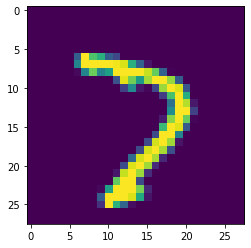

In [38]:
import matplotlib.pyplot as plt
plt.imshow(data[0][0].view(28,28))
plt.show()

In [40]:
print(data[0][0].shape)

torch.Size([1, 28, 28])


Balancing Dataset

In [41]:
total = 0
counter_dict = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,} 

for data in trainset:
  Xs, ys = data
  for y in ys:
    counter_dict[int(y)] += 1
    total +=1

print(counter_dict) #balancing datasets

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [42]:
for i in counter_dict:
  print(f"{i}:{counter_dict[i]/total*100}")

0:9.871666666666666
1:11.236666666666666
2:9.93
3:10.218333333333334
4:9.736666666666666
5:9.035
6:9.863333333333333
7:10.441666666666666
8:9.751666666666667
9:9.915000000000001


In [43]:
import torch.nn as nn
import torch.nn.functional as F

In [70]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [72]:
import torch.optim as optim #optimizer sets and regulate  the weights to reduce the loss
optimizer = optim.Adam(net.parameters(), lr = 0.001)

EPOCHS = 3 #FULL PASS FOR DATA
for epoch in range(EPOCHS):
  for data in trainset:
    X, y = data
    net.zero_grad()
    output = net(X.view(-1,28*28 ))
    loss = F.nll_loss(output, y)
    loss.backward()
    optimizer.step()

print(loss)


tensor(0.0108, grad_fn=<NllLossBackward>)


Check Accuracy

In [74]:
correct = 0
total = 0

with torch.no_grad():
  for data in trainset:
    X,y = data
    output = net(X.view(-1,784))
    for idx, i in enumerate(output):
      if torch.argmax(i) == y[idx]:
        correct += 1

      total +=1
print('Accuracy', round(correct/total,3))


Accuracy 0.972


<function matplotlib.pyplot.show>

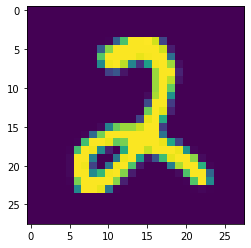

In [80]:
import matplotlib.pyplot as plt
plt.imshow(X[2].view(28,28))
plt.show

In [83]:
print(torch.argmax(net(X[2].view(-1,784))[0]))

tensor(0)
